# Tugas Data Visualization 7

* Silakan download dan kerjakan soal berikut dimanapun (laptop pribadi/google colab/etc.)
* Setelah selesai mengerjakan, upload file ini di tempat yang telah disediakan pada platform.
* Beri nama file seperti berikut: {username}-dataviz-7.ipynb
* Contoh: johndoe-ab12-dataviz-7.ipynb
* Tutorial: https://discourse.pacmann.ai/t/pengumuman-seluruh-platform-pacmann-ai/409
* Username dapat dilihat di dalam akun anda.
* Mohon jangan mengubah nama variabel yang telah diberikan.
* Namun anda diperbolehkan untuk menambah variabel apapun.
---

In [1]:
!pip install geopandas

     |████████████████████████████████| 1.0MB 7.1MB/s 
     |████████████████████████████████| 15.3MB 245kB/s 
     |████████████████████████████████| 6.5MB 37.4MB/s 
     |████████████████████████████████| 92kB 10.6MB/s 
  Found existing installation: click 8.0.0
    Uninstalling click-8.0.0:
      Successfully uninstalled click-8.0.0


In [2]:
!pip install contextily

     |████████████████████████████████| 19.1MB 1.2MB/s 


In [3]:
!pip install mapclassify

In [4]:
!pip install osmnx

     |████████████████████████████████| 102kB 6.5MB/s 
     |████████████████████████████████| 10.3MB 14.2MB/s 
     |████████████████████████████████| 1.0MB 33.5MB/s 
     |████████████████████████████████| 61kB 7.9MB/s 
ERROR: google-colab 1.0.0 has requirement requests~=2.23.0, but you'll have requests 2.25.1 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
  Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [66]:
import pandas as pd 
import geopandas as gpd
import osmnx as ox 
import matplotlib.pyplot as plt 
from shapely.geometry import Point, LineString, Polygon
%matplotlib inline
import os
import contextily as ctx
import numpy as np

epsg_jkt = 5330
epsg_mercator = 3857
default_crs = {'init':'epsg:4326'}

### Petunjuk Pengerjaan:
- Sebagian besar soal ini merujuk pada materi yang tersedia pada platform.
- Pada materi day 13, diberikan tanda "Tugas" pada bagian-bagian tertentu. 

1. Pada bagian 2.a, cobalah untuk melakukan hal yang sama dengan materi, namun, gantilah warna berdasarkan `random_bobot`.

In [88]:
tags = {'amenity': 'cafe'}
cafe = ox.geometries_from_place("Jakarta, Indonesia", tags)
print(len(cafe))

379


In [89]:
cafe.reset_index(inplace=True)
cafe.head()

,element_type,osmid,amenity,name,geometry,tourism,cuisine,brand,brand:wikidata,brand:wikipedia,official_name,takeaway,notes,speciality,internet_access,atm,opening_hours,shop,addr:city,addr:housenumber,addr:postcode,addr:street,operator,level,outdoor_seating,smoking,description,source,website,wheelchair,name:en,name:de,addr:housename,internet_access:fee,name:ja,ele,brand:en,brand:zh,name:zh,payment:coins,...,takeaway:gofood,takeaway:grabfood,bar,payment:samsung_pay,toilets,payment:otto_pay,payment:shopeepay,payment:shopeepay:gpn_qris,email,payment:grabpay,payment:ovo:gpn_qris,payment:prima_debit,alt_name,addr:district,addr:hamlet,internet_access:ssid,payment:bca_card,payment:starbucks_card,toilets:access,payment:cashbac,payment:sakuku,payment:sakuku:gpn_qris,payment:contactless,payment:credit_cards,payment:debit_cards,payment:electronic_purses,reservation,payment:E-Payment,image,nodes,building,building:levels,building:roof,building:structure,building:walls,addr:full,building:colour,height,building:condition,building:floor
0,node,824317908,cafe,Internet cafe,POINT (106.82912 -6.18609),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,node,824317972,cafe,Tator,POINT (106.82918 -6.18576),hotel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,node,824317998,cafe,Internet cafe,POINT (106.82923 -6.18541),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,node,824318107,cafe,Internet cafe,POINT (106.82927 -6.18527),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,node,1741564285,cafe,JCO Donuts & Cafe,POINT (106.83272 -6.22114),NaN,coffee_shop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(106.681097225, 106.975634875, -6.329430505, -6.087727395)

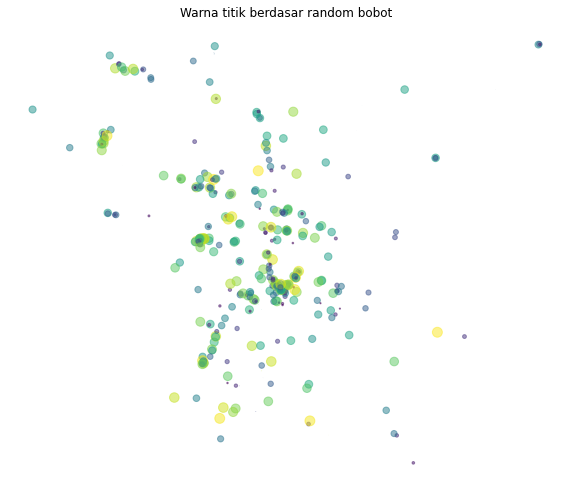

In [90]:
np.random.seed(10)
cafe["random_bobot"] = np.random.uniform(size=len(cafe))

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
cafe.plot(markersize=cafe["random_bobot"]*100, linewidth=1, column=cafe["random_bobot"], alpha=0.5, ax=ax)
ax.set_title("Warna titik berdasar random bobot")
ax.axis("off")

2. Pada bagian 2.b, anda diminta untuk melakukan visualisasi peta jakarta dengan menggunakan scheme yang lain. Hint: cek jakarta_planar.plot?

<AxesSubplot:>

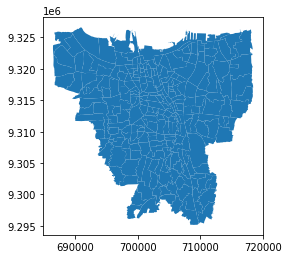

In [91]:
jakarta = gpd.read_file("dki_kelurahan")
jakarta.plot()

In [92]:
# proyeksi ke planar
jakarta_planar = jakarta.to_crs(epsg=epsg_jkt)

# hitung luas dalam hektar
jakarta_planar["luas_hektar"] = jakarta_planar.area/(10000^2)

Text(0.5, 1.0, 'Luas Jakarta Dalam Hektar: Natural Breaks')

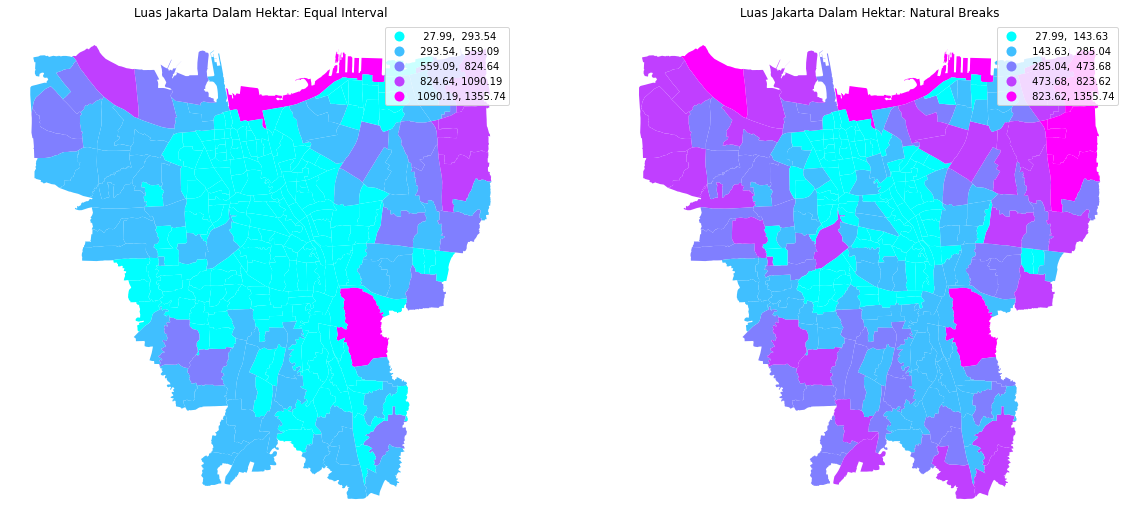

In [93]:
fig = plt.figure(figsize=(20,20))

ax = fig.add_subplot(121)
jakarta_planar.plot(column="luas_hektar", cmap="cool", scheme="equal_interval", k=5, legend=True, ax=ax)
ax.axis("off")
ax.set_title("Luas Jakarta Dalam Hektar: Equal Interval")

ax = fig.add_subplot(122)
jakarta_planar.plot(column="luas_hektar", cmap="cool", scheme="natural_breaks", k=5, legend=True, ax=ax)
ax.axis("off")
ax.set_title("Luas Jakarta Dalam Hektar: Natural Breaks")


3. Pada bagian 2.c anda diminta untuk melakukan hal yang sama dengan materi, namun, gantilah dengan menggunakan basemap yang lain. Hint: Gunakan ctx.providers?

In [94]:
transjakarta_lines = gpd.read_file("transjakarta_lines.geojson")
transjakarta_data = pd.read_excel("TJ_Agustus_2020.xlsx", index_col=0).T.reset_index()

In [95]:
transjakarta_data.head()

,index,Rata-rata Harlan,Rata-rata Weekday,Rata-rata Weekend
0,1,28434,35590,31435
1,2,11574,13576,12413
2,3,15090,17755,16207
3,4,8332,10669,9312
4,5,11604,14139,12667


In [96]:
# gabungkan data keduanya
transjakarta_lines['koridor'] = transjakarta_lines['koridor'].apply(int)
transjakarta_data['koridor'] = transjakarta_data['index'].apply(int)
transjakarta = pd.merge(transjakarta_lines, transjakarta_data)
# convert kembali ke geodataframe
transjakarta = gpd.GeoDataFrame(transjakarta)
# beri crs
transjakarta.crs = transjakarta_lines.crs
# convert ke planar
transjakarta_planar = transjakarta.to_crs(epsg=epsg_jkt)

In [97]:
tj_lines_mercator = transjakarta.to_crs(epsg=epsg_mercator)

In [98]:
ctx.providers.keys()

dict_keys(['OpenStreetMap', 'OpenSeaMap', 'OpenPtMap', 'OpenTopoMap', 'OpenRailwayMap', 'OpenFireMap', 'SafeCast', 'Thunderforest', 'OpenMapSurfer', 'Hydda', 'MapBox', 'Stamen', 'Esri', 'OpenWeatherMap', 'HERE', 'FreeMapSK', 'MtbMap', 'CartoDB', 'HikeBike', 'BasemapAT', 'nlmaps', 'NASAGIBS', 'NLS', 'JusticeMap', 'Wikimedia', 'GeoportailFrance', 'OneMapSG'])

In [99]:
ctx.providers.Esri.keys()

dict_keys(['WorldStreetMap', 'DeLorme', 'WorldTopoMap', 'WorldImagery', 'WorldTerrain', 'WorldShadedRelief', 'WorldPhysical', 'OceanBasemap', 'NatGeoWorldMap', 'WorldGrayCanvas'])

Text(0.5, 1.0, 'Jalur Busway dengan Basemap Esri NatGeoWorldMap')

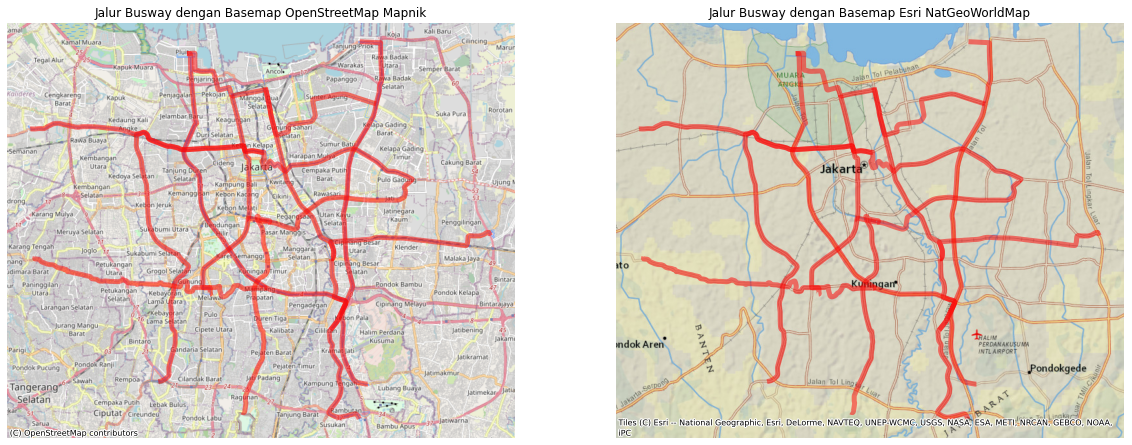

In [100]:
fig = plt.figure(figsize=(20,20))

ax = fig.add_subplot(121)
tj_lines_mercator.plot(ax=ax, linewidth=5, color="red", alpha=0.5)
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)
ax.axis("off")
ax.set_title("Jalur Busway dengan Basemap OpenStreetMap Mapnik")

ax = fig.add_subplot(122)
tj_lines_mercator.plot(ax=ax, linewidth=5, color="red", alpha=0.5)
ctx.add_basemap(ax, source=ctx.providers.Esri.NatGeoWorldMap)
ax.axis("off")
ax.set_title("Jalur Busway dengan Basemap Esri NatGeoWorldMap")

4. Dengan menggunakan referensi dari materi day 13, buatlah kombinasi dari peta yang sudah dijelaskan (cafe, kelurahan, transjakarta) untuk mengetahui berapa banyak cafe pada radius 200m dari jalur transjakarta

In [101]:
cafe_planar = cafe.to_crs(epsg=epsg_jkt)

In [102]:
# menambah informasi data jumlah cafe ke kelurahan
# pada spatial join, elemen yang ingin diagregasi (cafe) berada di kiri aggregator (kelurahan)
# kolom geometry akan berubah menjadi kolom geometri yang ingin diagregasi
cafe_kelurahan = gpd.sjoin(cafe_planar[["osmid","name","geometry"]], jakarta_planar)
# cek datanya, sekarang tiap point ter-assign ke kelurahan tertentu
cafe_kelurahan.head()

,osmid,name,geometry,index_right,KEL_NAME,Kecamatan,ID,luas_hektar
0,824317908,Internet cafe,POINT (3547954.666 216730.099),120,KEBON SIRIH,MENTENG,3173020005,69.49914
1,824317972,Tator,POINT (3547961.903 216767.505),120,KEBON SIRIH,MENTENG,3173020005,69.49914
2,824317998,Internet cafe,POINT (3547966.964 216805.398),120,KEBON SIRIH,MENTENG,3173020005,69.49914
3,824318107,Internet cafe,POINT (3547971.370 216820.913),120,KEBON SIRIH,MENTENG,3173020005,69.49914
48,4240754722,Beer Garden Menteng,POINT (3547654.172 216652.405),120,KEBON SIRIH,MENTENG,3173020005,69.49914


In [103]:
# sekarang, agregat berdasar kelurahan
jumlah_cafe_setiap_kelurahan = cafe_kelurahan.groupby("index_right").size()

# gabungkan dengan geodataframe kelurahan
jakarta_planar["cafe_per_kelurahan"] = jumlah_cafe_setiap_kelurahan

# lihat datanya
jakarta_planar.dropna().head()

,KEL_NAME,Kecamatan,ID,geometry,luas_hektar,cafe_per_kelurahan
5,BANGKA,MAMPANG PRAPATAN,3171070001,"POLYGON ((3547379.676 209200.684, 3547382.429 ...",310.950175,9.0
8,CEMPAKA BARU,KEMAYORAN,3173060002,"POLYGON ((3551851.602 219091.746, 3551876.014 ...",94.694578,1.0
9,BENDUNGAN HILIR,TANAH ABANG,3173010002,"POLYGON ((3545862.351 216024.731, 3545862.334 ...",485.321587,5.0
11,GAMBIR,GAMBIR,3173080003,"POLYGON ((3548038.907 218206.875, 3548061.496 ...",250.159693,1.0
20,CIKINI,MENTENG,3173020003,"POLYGON ((3548590.697 216651.008, 3548591.962 ...",79.861641,3.0


In [104]:
jakarta_planar.crs == transjakarta_planar.crs

True

<AxesSubplot:>

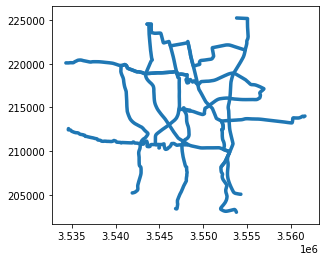

In [105]:
transjakarta_planar_buff200 = transjakarta_planar.copy()
transjakarta_planar_buff200["geometry"] = transjakarta_planar.geometry.buffer(200)
transjakarta_planar_buff200.plot()

In [106]:
tj_kelurahan = gpd.sjoin(jakarta_planar[["KEL_NAME","geometry"]], transjakarta_planar_buff200[["koridor","geometry"]])

(3530424.9735336825, 3565619.762964465, 194393.4081102861, 229048.82249192405)

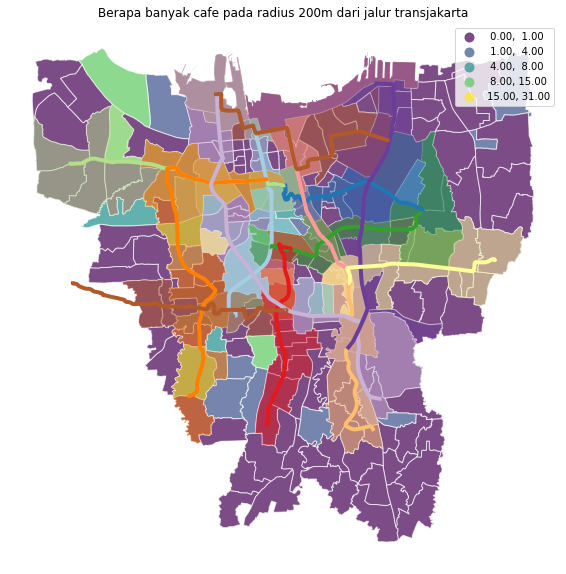

In [109]:
# visualisasikan
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
jakarta_planar.fillna(0).plot(ax=ax, facecolor="#eeeeee", column='cafe_per_kelurahan', edgecolor="white", scheme='fisher_jenks', alpha=0.7, legend=True)
tj_kelurahan.plot(column="koridor", categorical=True, k=13, cmap="Paired", alpha=0.5, ax=ax)
transjakarta_planar.plot(ax=ax, linewidth=4, column="koridor", alpha=1, categorical=True, k=13, cmap="Paired")
ax.set_title("Berapa banyak cafe pada radius 200m dari jalur transjakarta")
ax.axis("off")